## Observations and Insights 

In [325]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata.head(),study_results.head()
merge_df = pd.merge(mouse_metadata,study_results, how = 'inner', on = 'Mouse ID')



# Display the data table for preview
merge_df.head()
merge_df.groupby('Mouse ID')['Timepoint'].max()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [345]:
# checkpoint
df = merge_df.copy()

In [346]:
# Checking the number of mice.
need_to_drop = df.loc[df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep='last')]
need_to_drop['Mouse ID'].unique()
df_989_drop = df.loc[df['Mouse ID'] != 'g989']
df_989_drop
# We drop the g989 mouse ID because it had duplicated Timepoint with varied Tumor Volume, because we were unable to choose which tumor volume to take, we decided to drop the entire Mouse ID.
len(df_989_drop['Mouse ID'].unique())
df_989_drop.reset_index()
df_989_drop.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [347]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
len(df.loc[df.duplicated(subset = ['Mouse ID'], keep ='last')]['Mouse ID'].unique())

237

In [348]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dup = df.loc[df.duplicated(subset = ['Mouse ID'], keep ='last')]
df_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [349]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_dup_drop = df.drop_duplicates('Mouse ID', keep = 'last')
df_dup_drop = df_dup_drop.loc[df['Mouse ID'] != 'g989']
df_dup_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [336]:
# Checking the number of mice in the clean DataFrame.
num_mice = df_dup_drop['Mouse ID'].unique()
len(num_mice)

248

## Summary Statistics

In [337]:
df = df_dup_drop.copy()

In [359]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

group_drug = df.groupby('Drug Regimen')
summary_mean = group_drug['Tumor Volume (mm3)'].mean().round(2)
summary_med = group_drug['Tumor Volume (mm3)'].median().round(2)
summary_var = group_drug['Tumor Volume (mm3)'].var().round(2)
summary_std = group_drug['Tumor Volume (mm3)'].std().round(2)
summary_sem = group_drug['Tumor Volume (mm3)'].sem().round(2)

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame()
summary_table['Mean'] = summary_mean
summary_table['Med'] = summary_med
summary_table['Var'] = summary_var
summary_table['St Dev'] = summary_std
summary_table['St Err'] = summary_sem

summary_table

,Mean,Med,Var,St Dev,St Err
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [362]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = group_drug.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_table.columns = ['Mean', 'Med', 'Var', 'St Dev', 'St Err']
summary_table

,Mean,Med,Var,St Dev,St Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

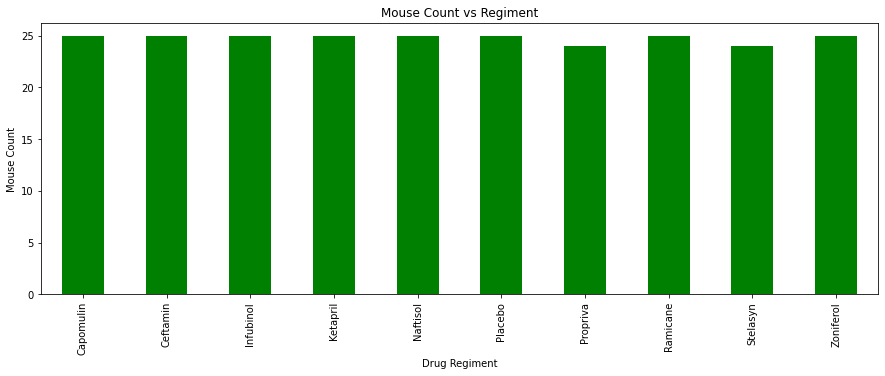

In [419]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_id = df_dup_drop.groupby('Drug Regimen')['Mouse ID'].count()
drug_id.plot.bar(color = 'green', figsize=(15,5))
plt.xlabel('Drug Regiment')
plt.ylabel('Mouse Count')
plt.title('Mouse Count vs Regiment')
plt.show()

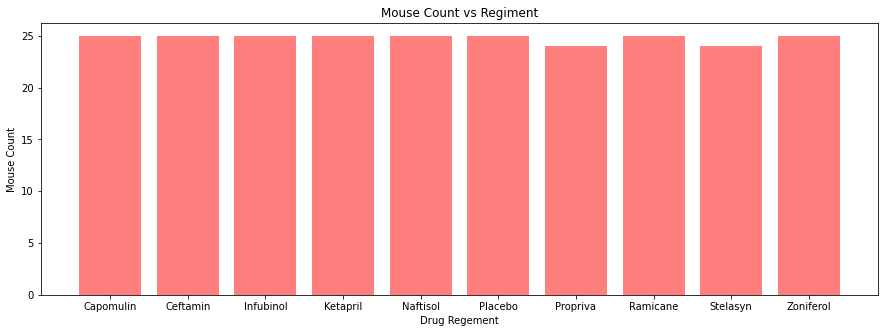

In [364]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
tick_label = drug_id.index
plt.figure(figsize=(15,5))
plt.xlabel('Drug Regement')
plt.ylabel('Mouse Count')
plt.title('Mouse Count vs Regiment')
plt.bar(tick_label,drug_id, color = 'red', alpha = .5, align = 'center')
plt.show()

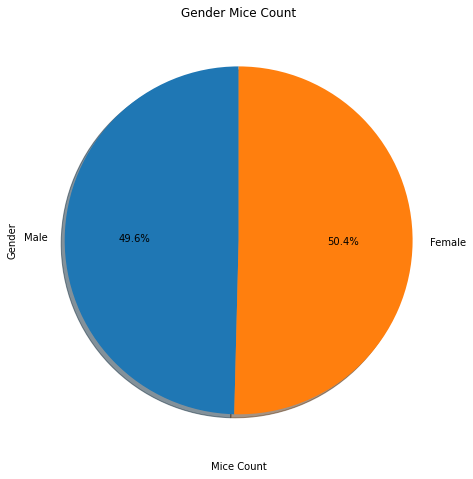

In [365]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_spread = df_dup_drop.groupby('Sex')['Mouse ID'].count()
gender_spread.plot.pie(figsize = (8,8),labels = ['Male','Female'],autopct='%1.1f%%', shadow = True, startangle = 90)
plt.xlabel('Mice Count')
plt.ylabel('Gender')
plt.title('Gender Mice Count')
plt.show()

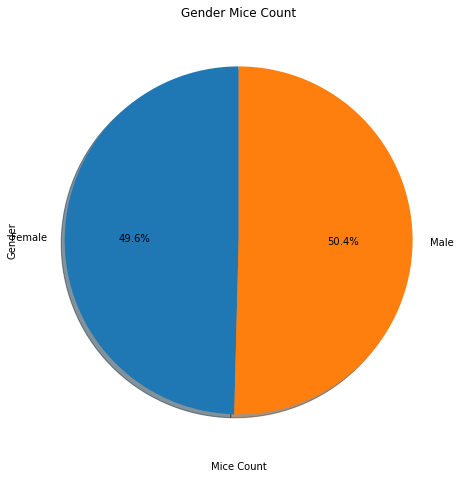

In [366]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize = (8,8))
plt.pie(gender_spread, labels = gender_spread.index, autopct = "%1.1f%%", shadow= True, startangle = 90)
plt.xlabel('Mice Count')
plt.ylabel('Gender')
plt.title('Gender Mice Count')
plt.show()

## Quartiles, Outliers and Boxplots

In [367]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_max_time = pd.DataFrame(df_dup_drop.groupby('Mouse ID')['Timepoint'].max()).reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

df_time = pd.merge(df_max_time,df_dup_drop,on=['Mouse ID','Timepoint'])
df_time

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


Upper/Lower Bound: Capomulin
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Upper/Lower Bound: Ramicane
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Upper/Lower Bound: Infubinol
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Upper/Lower Bound: Ceftamin
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


Text(0.5, 1.0, 'Drug Effectiveness')

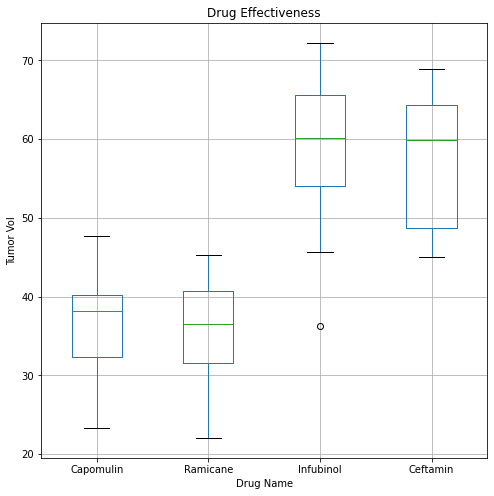

In [420]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

def boxplot_drugs(drug_list):
    drug_df = pd.DataFrame()
    for drugs in drug_list:
        tumor_vol = df_time.loc[df_time['Drug Regimen'] == drugs]['Tumor Volume (mm3)']
        drug_df[drugs] = tumor_vol.reset_index(drop=True)
        quartiles = tumor_vol.reset_index(drop=True).quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = quartiles[0.25] - (1.5*iqr)
        upper_bound = quartiles[0.75] + (1.5*iqr)
        print(f"Upper/Lower Bound: {drugs}")
        print(f"Values below {lower_bound.round(2)} could be outliers.")
        print(f"Values above {upper_bound.round(2)} could be outliers.")
    
    boxplot = drug_df.boxplot(figsize = (8,8))

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
        
    # Determine outliers using upper and lower bounds

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_drugs(drug_list)
plt.xlabel('Drug Name')
plt.ylabel('Tumor Vol')
plt.title('Drug Effectiveness')

## Line and Scatter Plots

Text(0.5, 1.0, 'My Mouse b128 Will Live')

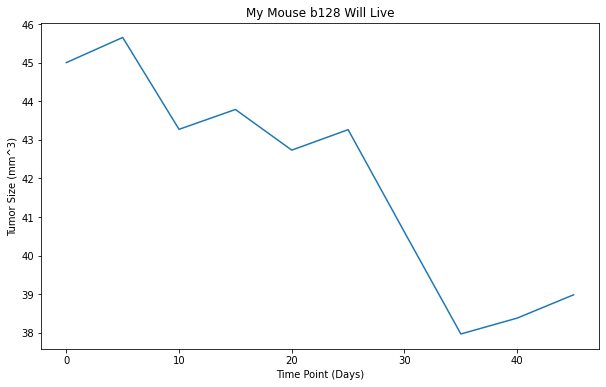

In [411]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_name = df_time.loc[df_time['Drug Regimen'] == 'Capomulin']['Mouse ID'].iloc[0]
mouse_info = df.loc[df['Mouse ID'] == mouse_name][['Timepoint','Tumor Volume (mm3)']]
mouse_info.index = mouse_info['Timepoint']
mouse_info['Tumor Volume (mm3)'].plot.line(figsize = (10,6))
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Size (mm^3)')
plt.title(f'My Mouse {mouse_name} Will Live')

In [418]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df.loc[df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
